
Semester ling project for comp 542
By Orbel B

this file will build a neural network to be used to classify yes or no on credit card applications 

activation function: relU
Loss function:  binary cross entropy 
During training, the cross-entropy loss function exponentially increases the penalty for wrong outputs to drive the weights and biases more aggressively in the right direction.

this file will:
1) import the clean data and make x number of 
randome_state = 31


There will be 3 neural network 
    NN 1 - 1 hidden layer
    NN 2 - 3 hidden layers
    NN 3 - 5 hidden layers
    

Will have two versions of the data one with smote applied to it and the other without any smote applied to it.

In [1]:
#importing tenserflow to create the neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import pandas as p
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#getting the data
data = p.read_csv('.\clean_data\creditcard_application_clean_data.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FLAG_OWN_CAR         36457 non-null  int64  
 1   FLAG_OWN_REALTY      36457 non-null  int64  
 2   ANNUAL_INCOME        36457 non-null  float64
 3   NAME_INCOME_TYPE     36457 non-null  int64  
 4   NAME_EDUCATION_TYPE  36457 non-null  int64  
 5   NAME_HOUSING_TYPE    36457 non-null  int64  
 6   AGE_YEARS            36457 non-null  float64
 7   EMPLOYMENT_LENGTH    36457 non-null  float64
 8   FLAG_WORK_PHONE      36457 non-null  int64  
 9   FLAG_PHONE           36457 non-null  int64  
 10  FLAG_EMAIL           36457 non-null  int64  
 11  STATUS               36457 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.3 MB


In [3]:
# splitting the data for training and testing
train, test = train_test_split(data, test_size=0.2)


In [4]:
#creating the first model
# this model will only have one hidden layer


#model is fidded with the data without any sampling techniques
model_1 = keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A", input_shape=(11,)),
        layers.Dense(1, activation="sigmoid")
    ]
)
#model is same sa previous model however the data was oversampled using SMOTE before fidding
model_1_s = keras.Sequential(
    [
        layers.Dense(22, activation="relu", name="layer_A", input_shape=(11,)),
        layers.Dense(1, activation="sigmoid")
    ]
) 


model_1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_1_s.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])


In [5]:
#splitting the data
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [6]:
#fiting the first NN
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)
hist = model_1.fit(x_train,y_train, epochs=20, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/20
228/228 [==============================] - 1s 2ms/step - loss: 0.3830 - accuracy: 0.8822 - val_loss: 0.3700 - val_accuracy: 0.8826
Epoch 2/20
228/228 [==============================] - 0s 1ms/step - loss: 0.3662 - accuracy: 0.8822 - val_loss: 0.3642 - val_accuracy: 0.8826
Epoch 3/20
228/228 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8822 - val_loss: 0.3631 - val_accuracy: 0.8826
Epoch 4/20
228/228 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8822 - val_loss: 0.3624 - val_accuracy: 0.8826
Epoch 5/20
228/228 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8822 - val_loss: 0.3622 - val_accuracy: 0.8826
Epoch 6/20
228/228 [==============================] - 0s 1ms/step - loss: 0.3617 - accuracy: 0.8822 - val_loss: 0.3613 - val_accuracy: 0.8826
Epoch 7/20
228/228 [==============================] - 1s 3ms/step - loss: 0.3614 - accuracy: 0.8822 - val_loss: 0.3618 - val_accuracy: 0.8826
Epoch 

[]

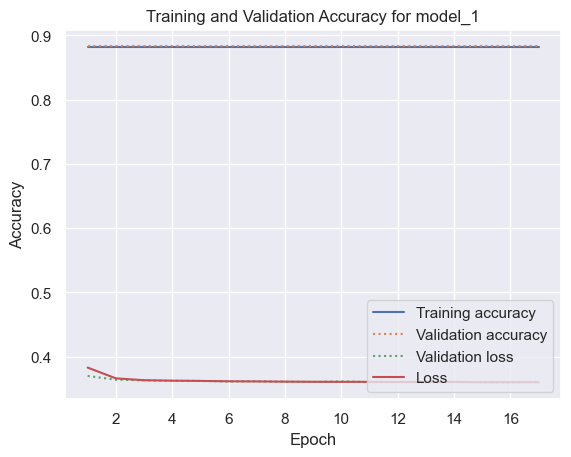

In [7]:
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
loss = hist.history['loss']
loss_val = hist.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy for model_1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 0s 1ms/step


Text(110.44999999999997, 0.5, 'Actual label')

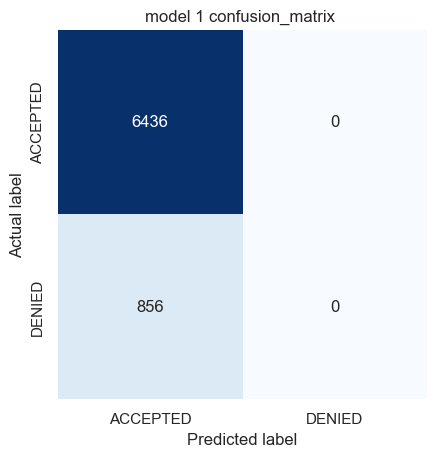

In [8]:
y_predicted = model_1.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model 1 confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Model_1 accuracy may be high however it hasnt learned anything. Since our data is oversampled with a majority being good clients and a minority being bad clients, our NN hasnt really learned the diffrnece between a good or bad client.

Now using SMOTE

In [9]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=31)
x_train_s, y_train_s = smote.fit_resample(x_train,y_train)

In [10]:
y_train_s.value_counts(normalize=True)

0    0.5
1    0.5
Name: STATUS, dtype: float64

In [11]:
hist_s = model_1_s.fit(x_train_s,y_train_s, epochs=100, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/100
403/403 [==============================] - 1s 2ms/step - loss: 0.7062 - accuracy: 0.5126 - val_loss: 0.7013 - val_accuracy: 0.4844
Epoch 2/100
403/403 [==============================] - 1s 1ms/step - loss: 0.6910 - accuracy: 0.5245 - val_loss: 0.6666 - val_accuracy: 0.6585
Epoch 3/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.5290 - val_loss: 0.6623 - val_accuracy: 0.6626
Epoch 4/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5303 - val_loss: 0.6997 - val_accuracy: 0.4931
Epoch 5/100
403/403 [==============================] - 1s 1ms/step - loss: 0.6887 - accuracy: 0.5319 - val_loss: 0.7003 - val_accuracy: 0.4861
Epoch 6/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6886 - accuracy: 0.5353 - val_loss: 0.7187 - val_accuracy: 0.4235
Epoch 7/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.5356 - val_loss: 0.6799 - val_accuracy: 0.5758

[]

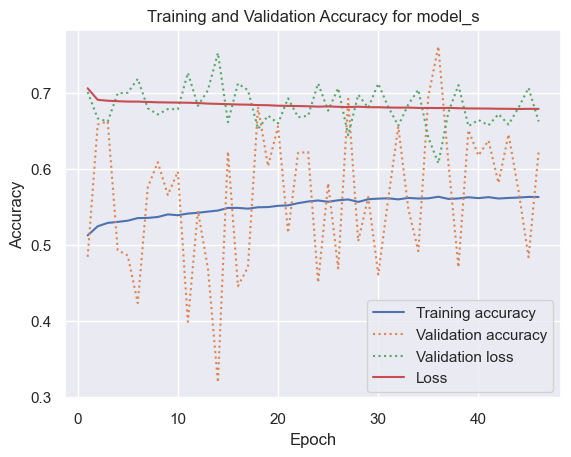

In [12]:
sns.set()
 
acc = hist_s.history['accuracy']
val = hist_s.history['val_accuracy']
loss = hist_s.history['loss']
loss_val = hist_s.history['val_loss']

epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, loss_val, ':', label='Validation loss')
plt.plot(epochs, loss, '-', label="Loss")
plt.title('Training and Validation Accuracy for model_s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

228/228 [==============================] - 0s 869us/step


Text(110.44999999999997, 0.5, 'Actual label')

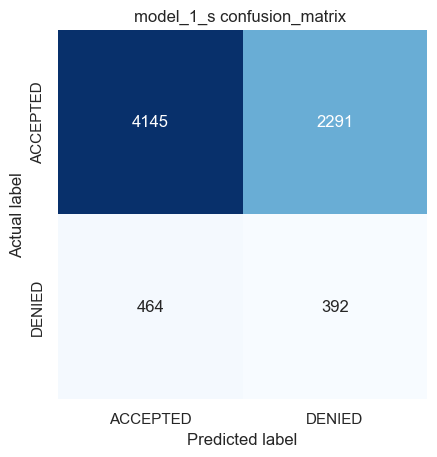

In [13]:
y_predicted = model_1_s.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['ACCEPTED', 'DENIED']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("model_1_s confusion_matrix ")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')